In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

In [2]:
path = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/Data/'
filename = 'source_distributions.csv'
data = pd.read_csv(path + filename)
print(len(data))
data = data[data['DNF_ZMEAN_SOF'] > 0.01]
data = data[data['MAG_PSF_G'] < 30.] [data['MAG_PSF_R'] < 30.] [data['MAG_PSF_I'] < 30.]
data = data[data['SOF_CM_G_1'] > -100.][data['SOF_CM_G_2'] > -100.]
data = data[data['DNF_ZMEAN_SOF'] < 2.9]
data = data.sort_values('DNF_ZMEAN_SOF')
data = data.reset_index()
print(len(data))
data

100000
93756


/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,index,COADD_OBJECT_ID,DNF_ZMEAN_SOF,MAG_PSF_G,MAG_PSF_R,MAG_PSF_I,MAG_PSF_Z,FLUX_RADIUS_G,FLUX_RADIUS_R,FLUX_RADIUS_I,FLUX_RADIUS_Z,SOF_CM_G_1,SOF_CM_G_2
0,11345,91693897,0.010776,19.713636,19.330271,19.706198,19.065746,10.456214,11.615316,11.385943,11.943000,-0.004923,0.008383
1,70447,242188783,0.010868,16.288645,15.579063,20.525568,20.571827,2.384065,2.637673,7.793355,7.979588,-0.069859,0.926430
2,88322,90769852,0.011335,18.184828,18.386549,18.204121,18.006939,12.602844,13.530595,13.388873,13.326994,-0.000839,0.015143
3,71154,260325677,0.011480,15.722734,15.865452,15.994400,17.397501,2.994761,2.773882,2.754752,4.232754,0.405329,0.209736
4,73580,162706326,0.011570,15.637291,15.800213,15.397779,99.000000,2.639816,3.289618,3.165119,2.769560,-0.203744,0.929747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93751,23709,347037909,2.032382,24.372408,23.989584,24.877098,99.000000,2.887397,2.254720,4.212158,6.836547,-0.054115,-0.033386
93752,21405,351853863,2.071300,22.036552,23.023943,22.543362,22.262579,2.572761,2.141808,2.120465,1.964857,-0.025244,-0.155088
93753,94707,111537359,2.108837,24.070406,24.361662,24.187279,99.000000,4.616542,2.488244,1.444762,2.895965,-0.696620,0.290153
93754,96847,463347590,2.212511,24.020628,24.144630,24.223688,99.000000,2.992969,2.337076,2.053176,-21.444225,-0.331821,0.273162


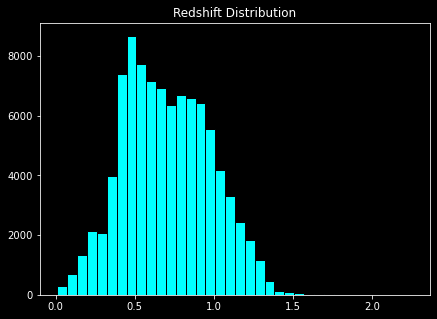

In [3]:
plt.figure(figsize=(7,5))
plt.title('Redshift Distribution')
plt.hist(data['DNF_ZMEAN_SOF'], color = 'cyan', edgecolor = 'black', bins = int(180/5))
plt.show()

In [4]:
data['g_r'] = data['MAG_PSF_G'] - data['MAG_PSF_R'] # g-r color
data['r_i'] = data['MAG_PSF_R'] - data['MAG_PSF_I'] # r-i color
data.head()

,index,COADD_OBJECT_ID,DNF_ZMEAN_SOF,MAG_PSF_G,MAG_PSF_R,MAG_PSF_I,MAG_PSF_Z,FLUX_RADIUS_G,FLUX_RADIUS_R,FLUX_RADIUS_I,FLUX_RADIUS_Z,SOF_CM_G_1,SOF_CM_G_2,g_r,r_i
0,11345,91693897,0.010776,19.713636,19.330271,19.706198,19.065746,10.456214,11.615316,11.385943,11.943000,-0.004923,0.008383,0.383366,-0.375927
1,70447,242188783,0.010868,16.288645,15.579063,20.525568,20.571827,2.384065,2.637673,7.793355,7.979588,-0.069859,0.926430,0.709581,-4.946505
2,88322,90769852,0.011335,18.184828,18.386549,18.204121,18.006939,12.602844,13.530595,13.388873,13.326994,-0.000839,0.015143,-0.201721,0.182428
3,71154,260325677,0.011480,15.722734,15.865452,15.994400,17.397501,2.994761,2.773882,2.754752,4.232754,0.405329,0.209736,-0.142718,-0.128948
4,73580,162706326,0.011570,15.637291,15.800213,15.397779,99.000000,2.639816,3.289618,3.165119,2.769560,-0.203744,0.929747,-0.162922,0.402433


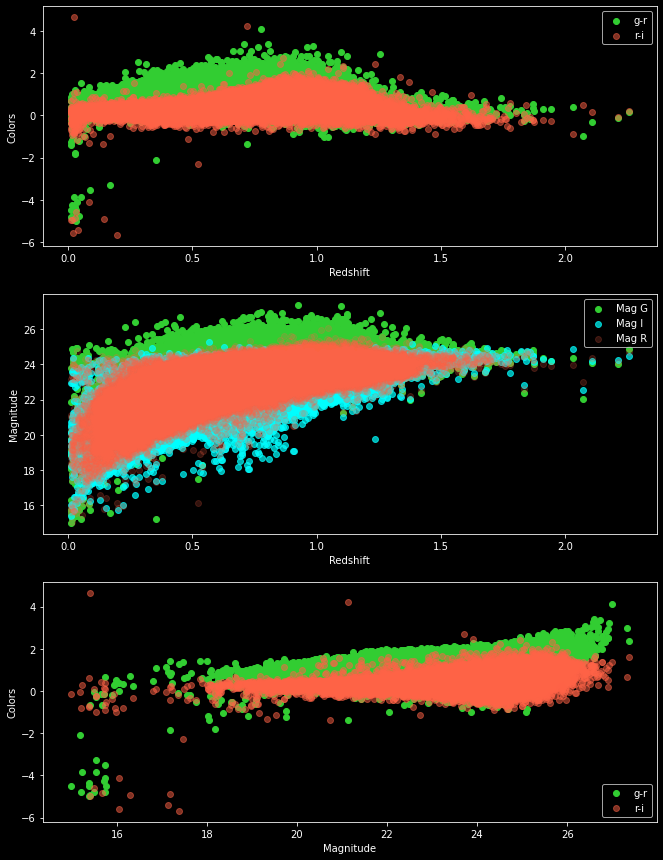

In [5]:
#Plots to see the distributions
plt.figure(figsize=(11,15))

plt.subplot(3, 1, 1)
plt.scatter(data['DNF_ZMEAN_SOF'], data['g_r'], color = 'limegreen', alpha = 1., label='g-r')
plt.scatter(data['DNF_ZMEAN_SOF'], data['r_i'], color = 'tomato', alpha = 0.5, label='r-i')
plt.xlabel('Redshift')
plt.ylabel('Colors')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(data['DNF_ZMEAN_SOF'], data['MAG_PSF_G'], color = 'limegreen', alpha = 1., label='Mag G')
plt.scatter(data['DNF_ZMEAN_SOF'], data['MAG_PSF_I'], color = 'cyan', alpha = 0.7, label='Mag I')
plt.scatter(data['DNF_ZMEAN_SOF'], data['MAG_PSF_R'], color = 'tomato', alpha = 0.2, label='Mag R')

plt.xlabel('Redshift')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(data['MAG_PSF_G'], data['g_r'], color = 'limegreen', alpha = 1., label='g-r')
plt.scatter(data['MAG_PSF_G'], data['r_i'], color = 'tomato', alpha = 0.5, label='r-i')
plt.xlabel('Magnitude')
plt.ylabel('Colors')
plt.legend()

plt.show()

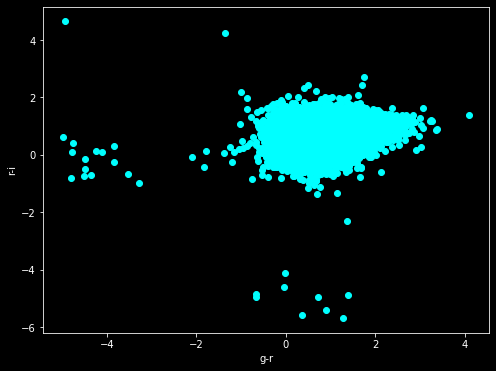

In [6]:
#Plots to see the distributions
plt.figure(figsize=(8,6))
plt.scatter(data['g_r'], data['r_i'], color = 'cyan', alpha = 1.)
plt.xlabel('g-r')
plt.ylabel('r-i')
plt.show()

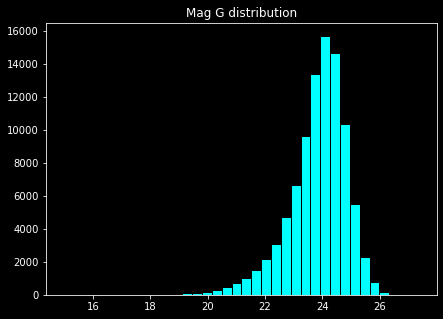

In [7]:
plt.figure(figsize=(7,5))
plt.title('Mag G distribution')
plt.hist(data['MAG_PSF_G'], color = 'cyan', edgecolor = 'black', bins = int(180/5))
plt.show()

In [8]:
dz, dm = 0.1, 0.1 # Range of redshift and magnitude for filtering

#returns magnitude in g, r, i bands and r sersic
def magnitude_and_color_distribution(z, mmax = 26):
    #objects with a redshift between z - dz and z + dz
    new_data = data[data['DNF_ZMEAN_SOF'] > z - dz] [data['DNF_ZMEAN_SOF'] < z + dz] 
    #getting a realistic magnitude for this redshift
    m = new_data.sample()['MAG_PSF_G'].values[0]
    while(m > mmax):
        m = new_data.sample()['MAG_PSF_G'].values[0]
    new_data = new_data[new_data['MAG_PSF_G'] > m - dm] [new_data['MAG_PSF_G'] < m + dm]
    random_object = new_data.sample()
    mg, mr, mi = random_object['MAG_PSF_G'].values[0], random_object['MAG_PSF_R'].values[0], random_object['MAG_PSF_I'].values[0]
    rg, rr, ri = random_object['FLUX_RADIUS_G'].values[0], random_object['FLUX_RADIUS_R'].values[0], random_object['FLUX_RADIUS_I'].values[0]
    e1, e2 = random_object['SOF_CM_G_1'].values[0], random_object['SOF_CM_G_2'].values[0]
    magnitude = {'mg': mg, 'mr': mr, 'mi': mi}
    radius = {'rg': rg, 'rr': rr, 'ri': ri}
    ellipticity = {'e1': e1, 'e2': e2}
    return(magnitude, radius, ellipticity)


In [9]:
z = 1.7
magnitude, radius, ellipticity = magnitude_and_color_distribution(z)
print(magnitude, radius, ellipticity)

{'mg': 24.4816761, 'mr': 24.08675003, 'mi': 24.51561546} {'rg': 2.75552368, 'rr': 2.1288166, 'ri': 1.75726926} {'e1': 0.02219295, 'e2': -0.03647879}


/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
